CAPSTONE TWO.


# 5. Modeling

## 5.1 Introduction

In this chapter we continue working on creating ML model to predict whether a borrower will pay off a loan using the historical LendingClub data.


**2. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**3. Transforming and visualizing**
- Train/test split
  

**4. Modelling** 
This is a classification problem. Here we have used the following classification models:

- Random Forest
- K-Nearest Neighbor (KNN)
- Gradient Boost
- Naive Bayes
- Support vector machine (SVM)



**5. Comparison of the models**
- choosing the best metrics to evaluate ML models

**6. Conclusion** 





## 5.2 Sourcing and loading

### 5.2.1 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split

from sklearn import tree, metrics
from io import StringIO
from IPython.display import Image  
import pydotplus

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import validation_curve

from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

### 5.2.2 Load the data

On our previous steps we alredy created the clean dataset: 

 * drop features with mising values
 * remove features with low variance
 * drop highly correlated features
 * convert categorical features to numeric
 * drop categorical features with many levels and constants
 
 After data cleaning and wrangling we reduced the number of our features from initial 151 to 60
 
 Then we used Recursive feature elimination algorithm to select optimal features (Recursive feature elimination algorithm 
 with  Cross-Validation).
  
 We used the Recursive feature elimination algorithm
   * For the first 1000 records  -> 70 optimal features
   * For 1000 randomly selected records

### Result for the first 1,000 records - 70 optimal features:

In [2]:
X1000 = pd.read_csv('accept_3_x.csv')

In [3]:
X1000.head()

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX,debt_settlement_flag_N,debt_settlement_flag_Y
0,36,10.0,3600.0,13.99,55000.0,5.91,0.0,675.0,1.0,7.0,...,1,0,0,0,0,0,0,0,1,0
1,36,10.0,24700.0,11.99,65000.0,16.06,1.0,715.0,4.0,22.0,...,0,0,1,0,0,0,0,0,1,0
2,60,10.0,20000.0,10.78,63000.0,10.78,0.0,695.0,0.0,6.0,...,0,1,0,0,0,0,0,0,1,0
3,60,3.0,10400.0,22.45,104433.0,25.37,1.0,695.0,3.0,12.0,...,0,0,0,0,0,0,0,0,1,0
4,36,10.0,20000.0,9.17,180000.0,14.67,0.0,680.0,0.0,12.0,...,1,0,0,0,0,0,0,0,1,0


In [4]:
X1000.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   term                                 1000 non-null   int64  
 1   emp_length                           1000 non-null   float64
 2   loan_amnt                            1000 non-null   float64
 3   int_rate                             1000 non-null   float64
 4   annual_inc                           1000 non-null   float64
 5   dti                                  1000 non-null   float64
 6   delinq_2yrs                          1000 non-null   float64
 7   fico_range_low                       1000 non-null   float64
 8   inq_last_6mths                       1000 non-null   float64
 9   open_acc                             1000 non-null   float64
 10  pub_rec                              1000 non-null   float64
 11  revol_bal                      

#### target "loan status"  values (Fully paid = 1, Charged off = 0)

In [5]:
target1000 =  pd.read_csv('accept_3_target.csv')

In [6]:
target1000.head()

,loan_status
0,1
1,1
2,1
3,1
4,1


### Result for the 1,000 randomly seleced records  - following 9 optimal features:

In [7]:
XR1000 = pd.read_csv('accept_3_xr.csv')

In [8]:
XR1000.head()

,loan_amnt,int_rate,total_pymnt,total_rec_int,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,debt_settlement_flag_N
0,7400.0,19.99,7469.850167,69.85,0.00,7486.29,704.0,700.0,1
1,18250.0,11.14,20012.516107,1762.52,0.00,13426.96,724.0,720.0,1
2,28800.0,27.34,8892.990000,1865.21,6324.64,885.28,584.0,580.0,1
3,6200.0,5.93,6781.057552,581.06,0.00,188.40,659.0,655.0,1
4,6500.0,15.31,6182.160000,1498.68,214.84,535.64,514.0,510.0,1


#### targetR  "loan status"  values (Fully paid = 1, Charged off = 0)

In [9]:
targetR1000 =  pd.read_csv('accept_3_target_r.csv')

In [10]:
targetR1000.head()

,loan_status
0,1
1,1
2,0
3,1
4,0


In [11]:
XR1000

,loan_amnt,int_rate,total_pymnt,total_rec_int,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,debt_settlement_flag_N
0,7400.0,19.99,7469.850167,69.85,0.00,7486.29,704.0,700.0,1
1,18250.0,11.14,20012.516107,1762.52,0.00,13426.96,724.0,720.0,1
2,28800.0,27.34,8892.990000,1865.21,6324.64,885.28,584.0,580.0,1
3,6200.0,5.93,6781.057552,581.06,0.00,188.40,659.0,655.0,1
4,6500.0,15.31,6182.160000,1498.68,214.84,535.64,514.0,510.0,1
...,...,...,...,...,...,...,...,...,...
995,25000.0,15.61,35898.575170,10898.58,0.00,5156.29,684.0,680.0,1
996,20000.0,13.67,24454.610657,4454.61,0.00,679.98,734.0,730.0,1
997,6025.0,9.75,6302.190000,277.19,0.00,5353.22,684.0,680.0,1
998,7950.0,15.31,2207.640000,740.40,0.00,276.80,604.0,600.0,1


## Optimal features review

Use Lending Club data dictionary https://resources.lendingclub.com/LCDataDictionary.xlsx 
to review the selected features that are unknown by the time of a loan and resulting features


  * debt_settlement_flag_N
  * debt_settlement_flag_Y
  * total_pymnt
  * last_pymnt_amnt
  * recoveries
  * revol_util
  * total_rec_int
  * total_rec_late_fee
  * 
  

In [12]:
XR1000 = XR1000.drop('debt_settlement_flag_N', axis=1)
XR1000 = XR1000.drop('total_pymnt', axis=1)
XR1000 = XR1000.drop('last_pymnt_amnt', axis=1)
XR1000 = XR1000.drop('recoveries', axis=1)
XR1000 = XR1000.drop('total_rec_int', axis=1)

In [13]:
XR1000.head()

,loan_amnt,int_rate,last_fico_range_high,last_fico_range_low
0,7400.0,19.99,704.0,700.0
1,18250.0,11.14,724.0,720.0
2,28800.0,27.34,584.0,580.0
3,6200.0,5.93,659.0,655.0
4,6500.0,15.31,514.0,510.0


In [14]:
X1000 = X1000.drop('debt_settlement_flag_N', axis=1)
X1000 = X1000.drop('debt_settlement_flag_Y', axis=1)
X1000 = X1000.drop('total_pymnt', axis=1)
X1000 = X1000.drop('last_pymnt_amnt', axis=1)
X1000 = X1000.drop('recoveries', axis=1)
X1000 = X1000.drop('revol_util', axis=1)
X1000 = X1000.drop('total_rec_int', axis=1)
X1000 = X1000.drop('total_rec_late_fee', axis=1)

In [15]:
X1000.head()

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX
0,36,10.0,3600.0,13.99,55000.0,5.91,0.0,675.0,1.0,7.0,...,0,0,1,0,0,0,0,0,0,0
1,36,10.0,24700.0,11.99,65000.0,16.06,1.0,715.0,4.0,22.0,...,0,0,0,0,1,0,0,0,0,0
2,60,10.0,20000.0,10.78,63000.0,10.78,0.0,695.0,0.0,6.0,...,0,0,0,1,0,0,0,0,0,0
3,60,3.0,10400.0,22.45,104433.0,25.37,1.0,695.0,3.0,12.0,...,1,0,0,0,0,0,0,0,0,0
4,36,10.0,20000.0,9.17,180000.0,14.67,0.0,680.0,0.0,12.0,...,0,0,1,0,0,0,0,0,0,0


## 5.3 . Transforming and visualizing

### Select only optimal features in our initial clean dataset


To execute the train/test split properly, we did following steps: 


1. Divide the acc subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
2. Create dummy variables to deal with categorical inputs
3. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
 


In [16]:
acc = pd.read_csv('accept_3_2.csv')

In [17]:
acc.shape

(1023608, 60)

In [18]:
X = acc.drop('loan_status', axis=1)

target = acc['loan_status']

X = pd.get_dummies(X)

In [19]:
X.shape

(1023608, 170)

We have dataset with 1,023,608 rows for our data modeling

In [20]:
target.describe()

count    1.023608e+06
mean     7.935411e-01
std      4.047639e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: loan_status, dtype: float64

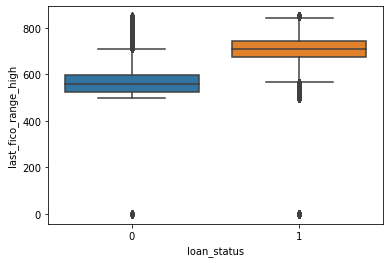

In [21]:
# Make a boxlot on acc, where x is loan status, y is last_fico_range_high 
sns.boxplot(x="loan_status", y="last_fico_range_high", data=acc)
plt.show() 

<AxesSubplot:xlabel='loan_amnt', ylabel='last_fico_range_high'>

/Users/natakat/anaconda/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


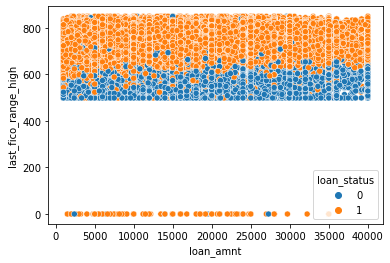

In [22]:
# Make a scatterplot on acc, where x is loan amount, y is last_fico_range_high and hue is loan_status
sns.scatterplot(x= "loan_amnt", y="last_fico_range_high",  hue = "loan_status", data =acc)

### Use optimal feutures we have got for 1,000 randomly selected rows

In [23]:
XR = X[XR1000.columns]
XR

,loan_amnt,int_rate,last_fico_range_high,last_fico_range_low
0,3600.0,13.99,564.0,560.0
1,24700.0,11.99,699.0,695.0
2,20000.0,10.78,704.0,700.0
3,10400.0,22.45,704.0,700.0
4,20000.0,9.17,654.0,650.0
...,...,...,...,...
1023603,18000.0,9.49,709.0,705.0
1023604,29400.0,13.99,719.0,715.0
1023605,32000.0,14.49,499.0,0.0
1023606,16000.0,12.79,684.0,680.0


In [24]:
XR.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1023608.0,14731.430147,8762.492258,1000.00,8000.00,12575.00,20000.00,40000.00
int_rate,1023608.0,13.406376,4.814057,5.31,9.93,12.99,16.24,30.99
last_fico_range_high,1023608.0,675.151567,81.008597,0.00,624.00,689.00,734.00,850.00
last_fico_range_low,1023608.0,657.998028,132.415940,0.00,620.00,685.00,730.00,845.00


### Use the selected optimal feutures we have got for the first 1,000 rows

In [25]:
X = X[X1000.columns]
X

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX
0,36,10.0,3600.0,13.99,55000.0,5.91,0.0,675.0,1.0,7.0,...,0,0,1,0,0,0,0,0,0,0
1,36,10.0,24700.0,11.99,65000.0,16.06,1.0,715.0,4.0,22.0,...,0,0,0,0,1,0,0,0,0,0
2,60,10.0,20000.0,10.78,63000.0,10.78,0.0,695.0,0.0,6.0,...,0,0,0,1,0,0,0,0,0,0
3,60,3.0,10400.0,22.45,104433.0,25.37,1.0,695.0,3.0,12.0,...,1,0,0,0,0,0,0,0,0,0
4,36,10.0,20000.0,9.17,180000.0,14.67,0.0,680.0,0.0,12.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023603,60,5.0,18000.0,9.49,130000.0,20.59,0.0,735.0,1.0,17.0,...,0,0,0,1,0,0,0,0,0,1
1023604,60,9.0,29400.0,13.99,180792.0,22.03,0.0,705.0,1.0,16.0,...,0,0,1,0,0,0,0,0,0,0
1023605,60,3.0,32000.0,14.49,157000.0,10.34,0.0,735.0,0.0,14.0,...,1,0,0,1,0,0,0,0,0,0
1023606,60,10.0,16000.0,12.79,150000.0,12.25,0.0,665.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X.describe()

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX
count,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,...,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06
mean,4.203130e+01,6.160305e+00,1.473143e+04,1.340638e+01,7.868392e+04,1.886576e+01,3.344112e-01,6.946077e+02,7.190116e-01,1.209292e+01,...,3.924715e-01,3.144866e-01,5.898772e-01,6.838946e-02,9.953029e-03,1.289263e-02,1.651023e-02,3.584282e-02,7.583763e-02,8.411521e-02
std,1.041032e+01,3.611333e+00,8.762492e+03,4.814057e+00,7.290254e+04,1.079899e+01,9.000680e-01,3.098041e+01,9.587176e-01,5.518546e+00,...,4.883010e-01,4.643113e-01,4.918560e-01,2.524132e-01,9.926719e-02,1.128115e-01,1.274271e-01,1.858982e-01,2.647383e-01,2.775607e-01
min,3.600000e+01,0.000000e+00,1.000000e+03,5.310000e+00,1.600000e+01,-1.000000e+00,0.000000e+00,6.600000e+02,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,3.000000e+00,8.000000e+03,9.930000e+00,4.800000e+04,1.248000e+01,0.000000e+00,6.700000e+02,0.000000e+00,8.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.600000e+01,7.000000e+00,1.257500e+04,1.299000e+01,6.650000e+04,1.823000e+01,0.000000e+00,6.850000e+02,0.000000e+00,1.100000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+01,1.000000e+01,2.000000e+04,1.624000e+01,9.400000e+04,2.465000e+01,0.000000e+00,7.100000e+02,1.000000e+00,1.500000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.000000e+01,1.000000e+01,4.000000e+04,3.099000e+01,1.099920e+07,9.990000e+02,3.900000e+01,8.450000e+02,8.000000e+00,9.000000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Split into testing and training datasets

In [27]:
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, target, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25)


## 5.4 Modeling

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

Predict descrit class label



### 5.4.1 Classification models

Classification algorithm - Decision Tree

### Random Forest

In [28]:
# Train a random forest classifier

rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight="balanced", n_jobs=-1, verbose=True)
rf_model.fit(XR_train, yR_train)

y_pred = rf_model.predict(XR_test)
pl = confusion_matrix(yR_test,y_pred)

print(pl)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s


[[ 40106  12446]
 [ 17779 185571]]


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


<AxesSubplot:>

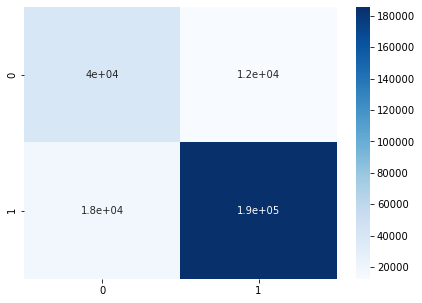

In [29]:
# plot Confusion matrix
plt.figure(figsize = (7,5))
sns.heatmap(pl, annot=True, cmap ='Blues')

In [30]:
print(classification_report(yR_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73     52552
           1       0.94      0.91      0.92    203350

    accuracy                           0.88    255902
   macro avg       0.82      0.84      0.83    255902
weighted avg       0.89      0.88      0.88    255902



In [31]:
print("Accuracy:", metrics.accuracy_score(yR_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(yR_test,y_pred))
print('Precision score' , metrics.precision_score(yR_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(yR_test,y_pred, pos_label = 0))
print('F1 score' , metrics.f1_score(yR_test,y_pred, average='weighted'))

Accuracy: 0.8818883791451415
Balanced accuracy: 0.8378686856996429
Precision score 0.9371468106273704
Recall score 0.7631679098797381
F1 score 0.8839555028220252


### Train a Random Forest classifier for X (62 features)

In [32]:
# Train a random forest classifier

rf_model2 = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight="balanced", n_jobs=-1, verbose=True)
rf_model2.fit(X_train, y_train)

y_pred2 = rf_model2.predict(X_test)
pl2 = confusion_matrix(y_test,y_pred)

print(pl2)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s


[[ 11957  40854]
 [ 45928 157163]]


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


<AxesSubplot:>

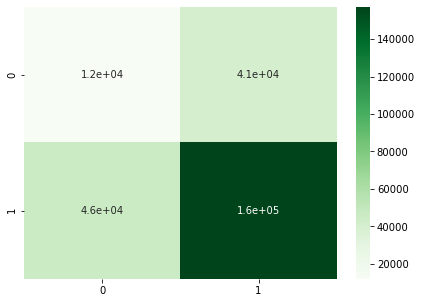

In [33]:
#plot Confusion matrix

plt.figure(figsize = (7,5))
sns.heatmap(pl2, annot=True, cmap ='Greens')

In [34]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     52811
           1       0.94      0.94      0.94    203091

    accuracy                           0.91    255902
   macro avg       0.86      0.86      0.86    255902
weighted avg       0.91      0.91      0.91    255902



In [35]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred2))
print('Precision score' , metrics.precision_score(y_test,y_pred2, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred2, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred2, average='weighted'))

recall_rf = metrics.recall_score(y_test,y_pred2, pos_label = 0)
F1_rf = metrics.f1_score(y_test,y_pred2, average='weighted')

Accuracy: 0.9057725222936905
Balanced accuracy: 0.8551925669134215
Precision score 0.9400304863057481
Recall score 0.76906326333529
F1 score 0.9056800814443


#### Compute Receiver operating characteristic (ROC)

In [36]:
metrics.roc_curve(y_test, y_pred2)

(array([0.        , 0.23093674, 1.        ]),
 array([0.        , 0.94132187, 1.        ]),
 array([2, 1, 0]))

#### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [37]:
rf_roc_auc = metrics.roc_auc_score(y_test, y_pred2)
rf_roc_auc

0.8551925669134215

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


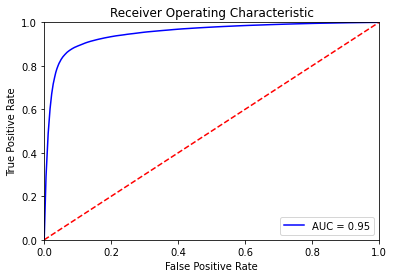

In [38]:
probs = rf_model2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-nearest neighbor

In [39]:
knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)



In [40]:
#Confusion matrix:

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[   442  52369]
 [   519 202572]]


<AxesSubplot:>

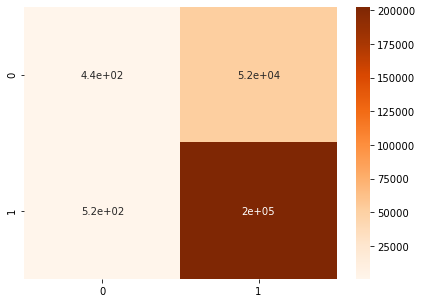

In [41]:
plt.figure(figsize = (7,5))
sns.heatmap(cm_knn, annot=True, cmap ='Oranges')

In [42]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.01      0.02     52811
           1       0.79      1.00      0.88    203091

    accuracy                           0.79    255902
   macro avg       0.63      0.50      0.45    255902
weighted avg       0.73      0.79      0.71    255902



In [43]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_knn))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_knn))
print('Precision score' , metrics.precision_score(y_test,y_pred_knn, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred_knn, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred_knn, average='weighted'))

recall_knn = metrics.recall_score(y_test,y_pred_knn, pos_label = 0)
F1_knn = metrics.f1_score(y_test,y_pred_knn, average='weighted')

Accuracy: 0.7933271330431181
Balanced accuracy: 0.5029069819033505
Precision score 0.7945838448896019
Recall score 0.00836946848194505
F1 score 0.7053821660739947


#### Compute Receiver operating characteristic (ROC)

In [44]:
metrics.roc_curve(y_test, y_pred_knn)

(array([0.        , 0.99163053, 1.        ]),
 array([0.       , 0.9974445, 1.       ]),
 array([2, 1, 0]))

#### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [45]:
knn_roc_auc = metrics.roc_auc_score(y_test, y_pred_knn)
knn_roc_auc

0.5029069819033505

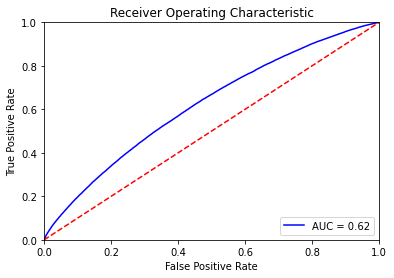

In [46]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting

In [47]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=None, max_depth = 2, random_state = 0)
model_res = gb.fit(X_train, y_train)

y_pred_gb = model_res.predict(X_test)

#Confusion matrix:

cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)



[[ 41054  11757]
 [ 12244 190847]]


<AxesSubplot:>

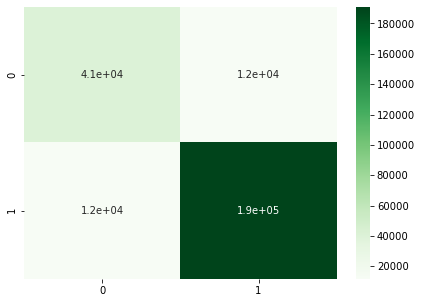

In [48]:
plt.figure(figsize = (7,5))
sns.heatmap(cm_gb, annot=True, cmap ='Greens')

In [49]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     52811
           1       0.94      0.94      0.94    203091

    accuracy                           0.91    255902
   macro avg       0.86      0.86      0.86    255902
weighted avg       0.91      0.91      0.91    255902



In [50]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_gb))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_gb))
print('Precision score' , metrics.precision_score(y_test,y_pred_gb, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred_gb, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred_gb, average='weighted'))

recall_gb = metrics.recall_score(y_test,y_pred_gb, pos_label = 0)
F1_gb = metrics.f1_score(y_test,y_pred_gb, average='weighted')

Accuracy: 0.9062101898382975
Balanced accuracy: 0.8585438401495943
Precision score 0.9419705435233263
Recall score 0.7773759254700725
F1 score 0.9063691265633111


#### Compute Receiver operating characteristic (ROC)

In [51]:
metrics.roc_curve(y_test, y_pred_gb)

(array([0.        , 0.22262407, 1.        ]),
 array([0.        , 0.93971175, 1.        ]),
 array([2, 1, 0]))

#### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [52]:
gb_roc_auc = metrics.roc_auc_score(y_test, y_pred_gb)
gb_roc_auc

0.8585438401495943

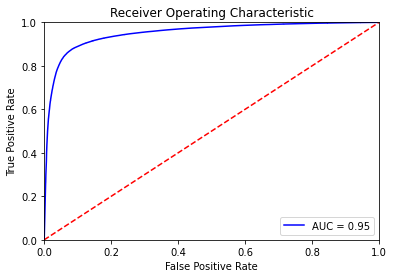

In [53]:
probs = gb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_pred_nb=nb.predict(X_test)



In [55]:
#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_pred_nb)
print(cnf_matrix)

print(classification_report(y_test, y_pred_nb))


[[ 46513   6298]
 [ 36975 166116]]
              precision    recall  f1-score   support

           0       0.56      0.88      0.68     52811
           1       0.96      0.82      0.88    203091

    accuracy                           0.83    255902
   macro avg       0.76      0.85      0.78    255902
weighted avg       0.88      0.83      0.84    255902



<AxesSubplot:>

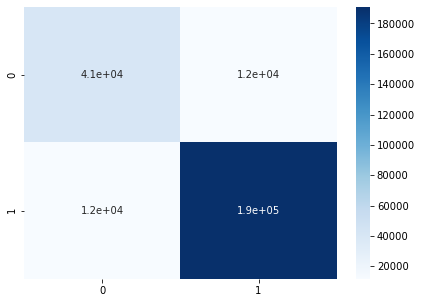

In [56]:
plt.figure(figsize = (7,5))
sns.heatmap(cm_gb, annot=True, cmap ='Blues')

In [57]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_nb))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_nb))
print('Precision score' , metrics.precision_score(y_test,y_pred_nb, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred_nb, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred_nb, average='weighted'))

recall_nb = metrics.recall_score(y_test,y_pred_nb, pos_label = 0)
F1_nb = metrics.f1_score(y_test,y_pred_nb, average='weighted')

Accuracy: 0.8309001101984353
Balanced accuracy: 0.8493416491874122
Precision score 0.9634716438340274
Recall score 0.8807445418568102
F1 score 0.8430225459321076


#### Compute Receiver operating characteristic (ROC)

In [58]:
metrics.roc_curve(y_test, y_pred_nb)

(array([0.        , 0.11925546, 1.        ]),
 array([0.        , 0.81793876, 1.        ]),
 array([2, 1, 0]))

#### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [59]:
nb_roc_auc = metrics.roc_auc_score(y_test, y_pred_nb)
nb_roc_auc

0.8493416491874121

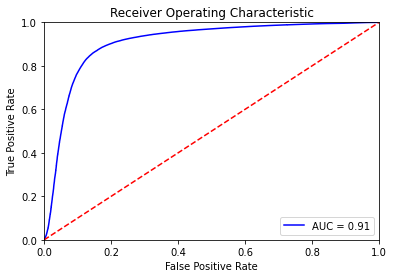

In [60]:
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Support Vector Machine (SVM)

In [61]:
## Unfortunately we need more powerful machine for the SVM algorithm to work for 1.2M records. 
#It took over 4 hours to run it for 2K
'''

# Train a linear SVM classifier on a subset of the unbalanced dataset using "balanced" class weights
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn import svm


X_train_rest_sample, y_train_sample = resample(X_train, y_train, n_samples=2000, random_state=42)

svm_model = svm.SVC(kernel="linear", class_weight="balanced", probability=True)
svm_model.fit(X_train_rest_sample, y_train_sample)

# predict
y_pred_svm = svm_model.predict(X_test)
y_pred_svm = np.where(y_pred_svm>0.5, 1, 0)



#Confusion matrix:

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

plt.figure(figsize = (7,5))
sns.heatmap(y_pred_svm, annot=True, cmap ='Reds')

print(classification_report(y_test, y_pred_svm))

print("Accuracy:", metrics.accuracy_score(y_test,y_pred_svm))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_svm))
print('Precision score' , metrics.precision_score(y_test,y_pred_svm, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred_svm, pos_label = 0))
print('F1 score' , metrics.f1_score(y_test,y_pred_svm, average='weighted'))

F1_svm = metrics.f1_score(y_test,y_pred_svm, average='weighted')

'''

'\n\n# Train a linear SVM classifier on a subset of the unbalanced dataset using "balanced" class weights\nfrom sklearn.utils import resample\nfrom sklearn.svm import SVC\nfrom sklearn import svm\n\n\nX_train_rest_sample, y_train_sample = resample(X_train, y_train, n_samples=2000, random_state=42)\n\nsvm_model = svm.SVC(kernel="linear", class_weight="balanced", probability=True)\nsvm_model.fit(X_train_rest_sample, y_train_sample)\n\n# predict\ny_pred_svm = svm_model.predict(X_test)\ny_pred_svm = np.where(y_pred_svm>0.5, 1, 0)\n\n\n\n#Confusion matrix:\n\ncm_svm = confusion_matrix(y_test, y_pred_svm)\nprint(cm_svm)\n\nplt.figure(figsize = (7,5))\nsns.heatmap(y_pred_svm, annot=True, cmap =\'Reds\')\n\nprint(classification_report(y_test, y_pred_svm))\n\nprint("Accuracy:", metrics.accuracy_score(y_test,y_pred_svm))\nprint("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_svm))\nprint(\'Precision score\' , metrics.precision_score(y_test,y_pred_svm, pos_label = 1))\nprint(\

## 5.5 Comparison of the models

We have a binary classification problem. Our records belonging to two classes fully paid - 1 and charged off - 1 (YES or NO). On testing our model on 255902 samples, we get the following result.


We applied different ML models above and evaluated their performances. Now we need to choose the best performing models by choosing the right metric for evaluating machine learning ML models.


#### Choosing for the best metrics to evaliate ML models:

#### 1.Accuracy

Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples. It works well only if there are equal number of samples belonging to each. That is not our case:

812275 borrowers fully paid their loans and 211333 = charged off. 

approximatelly 80% vs. 20%

In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class)



In [62]:
acc['loan_status'].value_counts(dropna=False)

1    812275
0    211333
Name: loan_status, dtype: int64

#### 2. Precision

Precision (#samples correctly predicted/#samples predicted)  is a valid choice of evaluation metric when we want to be very sure of our prediction
Being very precise means our model will leave a lot of credit defaulters untouched and hence lose money.



#### 3. Recall

Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. 
For example: If we are building a system to predict if a person will not pay a loan, we want to capture it even if we are not very sure.



#### 4. F1 Score

F1 Score ( 2*Precision*Recall/(Precision+Recall) combines precision and recall - used to measure a test’s accuracy

Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. 


**It seems that F1 is the best metric to use for our task if we you want to predict a person who will not repay a loan, we also want to be sure that we are right ant this person will not fully pay (Precision) and on the other hand we also want to capture as many of people who will not pay (Recall) as possible. The F1 score manages this tradeoff."



#### Comparison table

In [63]:
# Compare models

labels = [ 'Random Forest','KNN','Gradient Boost','Naive Bayes']

F1_score = [F1_rf, F1_knn, F1_gb, F1_nb]
roc_auc_score = [rf_roc_auc, knn_roc_auc, gb_roc_auc, nb_roc_auc]
recall_score = [recall_rf, recall_knn, recall_gb, recall_nb ]

score_tab_f1 = pd.DataFrame(list(zip(labels, F1_score, recall_score, roc_auc_score)), 
               columns =['Algorithm', 'Model F1 score', 'Recall score', 'ROC_AUC score']) 

print(score_tab_f1)


        Algorithm  Model F1 score  Recall score  ROC_AUC score
0   Random Forest        0.905680      0.769063       0.855193
1             KNN        0.705382      0.008369       0.502907
2  Gradient Boost        0.906369      0.777376       0.858544
3     Naive Bayes        0.843023      0.880745       0.849342


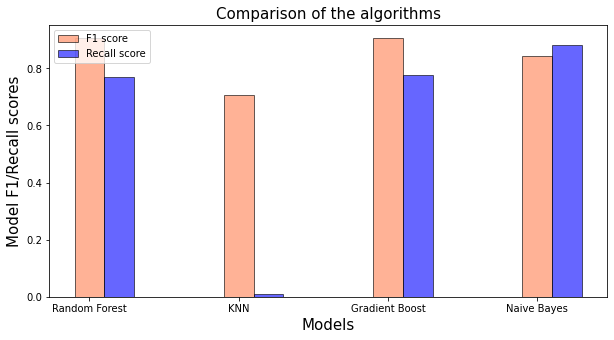

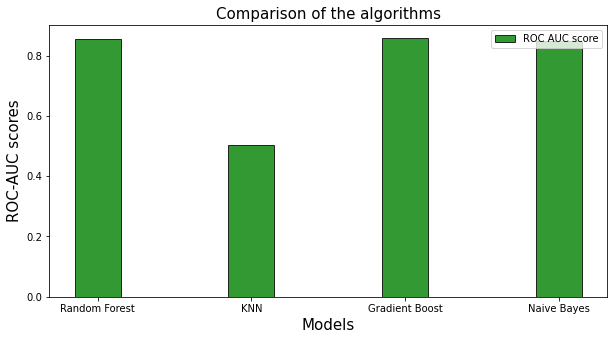

In [64]:
#plotting the F1 scores:


index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model F1/Recall scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,F1_score,color='coral',alpha=0.6,label='F1 score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,recall_score,color='blue',alpha=0.6,label='Recall score',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4], labels)
plt.legend()
plt.savefig("1.png")
plt.show()

#plotting and comparing ROC-AUC scores:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,roc_auc_score,color='green',alpha=0.8,label='ROC AUC score',edgecolor='k',width=0.3)
plt.xticks([1,2,3,4], labels)
plt.legend()
plt.savefig("2.png")
plt.show()


### Conclusion

We have evaluated each models in terms of model F1 score, Recall score and 'ROC-AUC' score for both the training and test data, and plotted them. 
The two best performing models are the Random forest and the Gradient boost. Both are the ensemble model, based on decision trees.

In [65]:
'''
                      F1 score     Recall         ROC_AUC score
Random Forest        0.904887      0.764045       0.85292
KNN                  0.705272      0.008385       0.502907
Gradient Boost       0.905928      0.779717       0.859061
Naive Bayes          0.851811      0.870666       0.852182
'''

'\n                      F1 score     Recall         ROC_AUC score\nRandom Forest        0.904887      0.764045       0.85292\nKNN                  0.705272      0.008385       0.502907\nGradient Boost       0.905928      0.779717       0.859061\nNaive Bayes          0.851811      0.870666       0.852182\n'